In [42]:
%load_ext autoreload
%autoreload 2
import os
import urllib.request
import pickle
import numpy as np
import cv2
from tools import *

%matplotlib inline
import matplotlib
from matplotlib.pyplot import imshow, imread

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Images loaded.
Processing images..
X shape:  (2000, 66, 200, 3)
y shape:  (2000,)
(66, 200, 3)


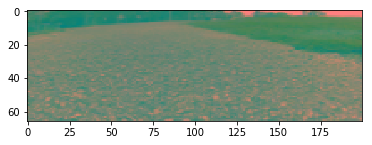

In [72]:
raw_X, raw_y = import_data('../loop1', cutoff=2000)
print('Images loaded.')
print('Processing images..')
raw_X = np.array([process_image(item) for item in raw_X])
raw_X = normalize(raw_X)
print('X shape: ', raw_X.shape)
print('y shape: ', raw_y.shape)
img = raw_X[-1]
print(img.shape)
imshow(img)

In [54]:
from keras.models import load_model
model_path = os.getcwd() + '/models/ud_sidewalk.hdf5'
model = load_model(model_path)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
activation_9 (Activation)    (None, 31, 98, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 47, 36)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
activation_11 (Activation)   (None, 5, 22, 48)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
__________

In [55]:
from keras import backend as K

In [74]:
layer_index = 8
output_layer = model.layers[layer_index].output
out_fcn = K.function([model.layers[0].input], [output_layer])
print(model.layers[0].input_shape)

print(model.layers[layer_index].output_shape)

(None, 66, 200, 3)
(None, 1, 18, 64)


(66, 200, 3)
(1, 18, 64)
-0.098


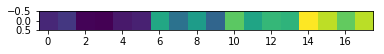

In [75]:
print(img.shape)
out_img = np.array(out_fcn([[img]]))[0][0]
print(out_img.shape)
imshow(out_img[:,:,20])
print(raw_y[-1])

# Verification with VGG-16 Model

In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
img_width = 128
img_height = 128
model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = './visualizations/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [32]:
layer_index = 12
output_layer = model.layers[layer_index].output
out_fcn = K.function([model.layers[0].input], [output_layer])
print(model.layers[0].input_shape)

print(model.layers[layer_index].output_shape)

(None, None, None, 3)
(None, None, None, 512)


(28, 28, 512)


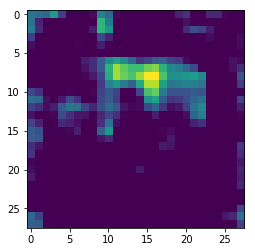

In [33]:

out_img = np.array(out_fcn([x]))[0][0]
print(out_img.shape)
imshow(out_img[:,:,20])